# Проект:телекоммуникации

<div style="border-radius: 15px; border: 3px solid navy; padding: 15px; ">
Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.
    
Описание услуг

Оператор предоставляет два основных типа услуг: 

Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая 
абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги: Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);

Выделенная линия технической поддержки (TechSupport);

Облачное хранилище файлов для резервного копирования данных (OnlineBackup);

Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

Описание данных

Данные состоят из файлов, полученных из разных источников:

* contract_new.csv — информация о договоре;

* personal_new.csv — персональные данные клиента;

* internet_new.csv — информация об интернет-услугах;

* phone_new.csv — информация об услугах телефонии.

Во всех файлах столбец customerID содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.
    
Цель проекта: Разработать модель прогнозирования оттока клиентов для оператора связи "Ниединогоразрыва.ком" на основе доступных данных и предоставить оператору инструмент для предсказания оттока и принятия мер по удержанию клиентов.
• BeginDate – дата начала пользования услугами,
    
• EndDate – дата окончания пользования услугами,
    
• Type – тип оплаты: ежемесячный, годовой и тд,
    
• PaperlessBilling – безналичный расчет,
    
• PaymentMethod – способ оплаты,
    
• MonthlyCharges – ежемесячные траты на услуги,
    
• TotalCharges – всего потрачено денег на услуги
    
• Dependents – наличие иждивенцев
    
• Senior Citizen – наличие пенсионного статуса по возрасту
    
• Partner – наличие супруга(и)
    
• MultipleLines – наличие возможности ведения параллельных линий во времязвонка
    
    
</div>

# План работы

<div style="border-radius: 15px; border: 5px solid purple; padding: 15px; ">
1.Загрузка данных

2.Изучение структуры и содержания данных

* Обработка пропущенных значений
* Создание новых признаков, если необходимо

3.Подготовка данных

* Изучение взаимосвязей между признаками
* Анализ корреляций между признаками
* Статистический анализ данных
* Визуализация данных для выявления важных закономерностей и тенденций

4. Разделение данных на обучающую и тестовую выборки(train_test_split)
    

5. Кодирование и масштабирование признаков
    
* Кодирование категориальных признаков для подготовки их к использованию в моделях машинного обучения.
* Масштабирование числовых признаков для обеспечения сопоставимого диапазона значений.
    
6. Выбор подходящей модели машинного обучения
    
* Рассмотрение нескольких моделей для прогнозирования оттока клиентов, таких как логистическая регрессия, дерево, случайный лес.
* Оценка производительности каждой модели на обучающей выборке с использованием AUC ROC.
* Выбор наилучшей модели для дальнейшего анализа.

7. Обучение модели на обучающей выборке
 
8. Оценка производительности модели на тестовой выборке
* Оценка производительности модели на тестовой выборке с использованием AUC ROC.   
    
9. Вывод

* Оценка важности признаков для прогнозирования оттока
* Интерпретация результатов модели и выявление ключевых факторов, влияющих на отток
* Предложение специальных условий и промокодов клиентам с высоким риском оттока
* Оценка эффективности предпринятых мер по удержанию клиентов
</div>

вопросов нет

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

import numpy as np

import seaborn as sns

from datetime import datetime

import matplotlib.pyplot as plt

import phik

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score

from sklearn.metrics import roc_auc_score, f1_score, make_scorer, r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from catboost import CatBoostClassifier

from lightgbm import LGBMClassifier

In [4]:
try:
    contract = pd.read_csv('/datasets/contract_new.csv')  
except:
    contract = pd.read_csv('D:/datasets/finn/contract_new.csv') 

In [5]:
try:
    internet = pd.read_csv('/datasets/internet_new.csv')
except:
    internet = pd.read_csv('D:/datasets/finn/internet_new.csv') 

In [6]:
try:
    personal = pd.read_csv('/datasets/personal_new.csv') 
except:
    personal = pd.read_csv('D:/datasets/finn/personal_new.csv')   

In [7]:
try:
    phone = pd.read_csv('/datasets/phone_new.csv')
except:
    phone = pd.read_csv('D:/datasets/finn/phone_new.csv')  

In [8]:
display(contract.head(20))
display(contract.info())
display(contract.describe())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [9]:
display(internet.head(20))
display(internet.info())
display(internet.describe())

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,3400-ESFUW,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [10]:
display(phone.head(20))
display(phone.info())
display(phone.describe())

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,4589-IUAJB,No
freq,1,3390


In [11]:
display(personal.head(20))
display(personal.info())
display(personal.describe())

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# Вывод по предварительному анализу

Рассмотренна информация о телефонных услугах . Обнаружено, что в данных о телефонных услугах наиболее часто встречающимся значением является "No" в признаке MultipleLines. В данных о личной информации клиентов мы заметили, что около 16,2% клиентов относятся к пожилым лицам (SeniorCitizen).

В предоставленных данных отсутствует информация о целевой переменной (оттоке клиентов).

В столбце MonthlyCharges таблицы "phone" среднее значение равно 64.76, а стандартное отклонение составляет 30.09. Эти значения указывают на различие в месячных платежах клиентов.

# 2.1 Обработка пропущенных значений

In [12]:
personal.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [13]:
phone.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

In [14]:
internet.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [15]:
contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [16]:
data = contract.merge(personal, on='customerID', how='left')
data = data.merge(internet, on='customerID', how='left')
data = data.merge(phone, on='customerID', how='left')

In [17]:
data.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

In [18]:
data['InternetService'].fillna('No', inplace=True)
data['OnlineSecurity'].fillna('No', inplace=True)
data['OnlineBackup'].fillna('No', inplace=True)
data['TechSupport'].fillna('No', inplace=True)
data['DeviceProtection'].fillna('No', inplace=True)
data['StreamingTV'].fillna('No', inplace=True)
data['StreamingMovies'].fillna('No', inplace=True)
data['MultipleLines'].fillna('No', inplace=True)

In [19]:
data.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

# 2.2 Создание новых признаков

In [20]:
data['target'] = np.where(data['EndDate'] == 'No', 0, 1).astype(int)

In [21]:
labels = ['Низкий', 'Средний', 'Высокий']
data['MonthlyPaymentCategory'] = pd.qcut(data['MonthlyCharges'], q=[0, 1/3, 2/3, 1], labels=labels)

print(data[['MonthlyCharges', 'MonthlyPaymentCategory']].head())

   MonthlyCharges MonthlyPaymentCategory
0           29.85                 Низкий
1           56.95                Средний
2           53.85                Средний
3           42.30                 Низкий
4           70.70                Средний


In [22]:
cutoff_date = datetime.strptime('2020-02-01', '%Y-%m-%d')

data.loc[data['EndDate'] == 'No', 'EndDate'] = pd.NaT

data['EndDate'] = pd.to_datetime(data['EndDate'])
data['BeginDate'] = pd.to_datetime(data['BeginDate'])

data.loc[data['EndDate'].isnull(), 'EndDate'] = cutoff_date

data['ContractDuration'] = (data['EndDate'] - data['BeginDate']).dt.days

In [23]:
data

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,target,MonthlyPaymentCategory,ContractDuration
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,Yes,No,No,No,No,No,0,Низкий,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,...,Yes,No,Yes,No,No,No,No,0,Средний,1036
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,Yes,Yes,No,No,No,No,No,0,Средний,123
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,...,Yes,No,Yes,Yes,No,No,No,0,Низкий,1371
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,...,No,No,No,No,No,No,No,0,Средний,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,2035.2,Male,0,...,Yes,No,Yes,Yes,Yes,Yes,Yes,0,Высокий,730
7039,2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7430.4,Female,0,...,No,Yes,Yes,No,Yes,Yes,Yes,0,Высокий,2191
7040,4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,325.6,Female,0,...,Yes,No,No,No,No,No,No,0,Низкий,337
7041,8361-LTMKD,2019-07-01,2020-02-01,Month-to-month,Yes,Mailed check,74.40,520.8,Male,1,...,No,No,No,No,No,No,Yes,0,Средний,215


# 3. Подготовка данных

In [24]:
coltodtop = ['customerID']
specialcorrdf = data
specialcorrdf = specialcorrdf.drop(coltodtop, axis=1)

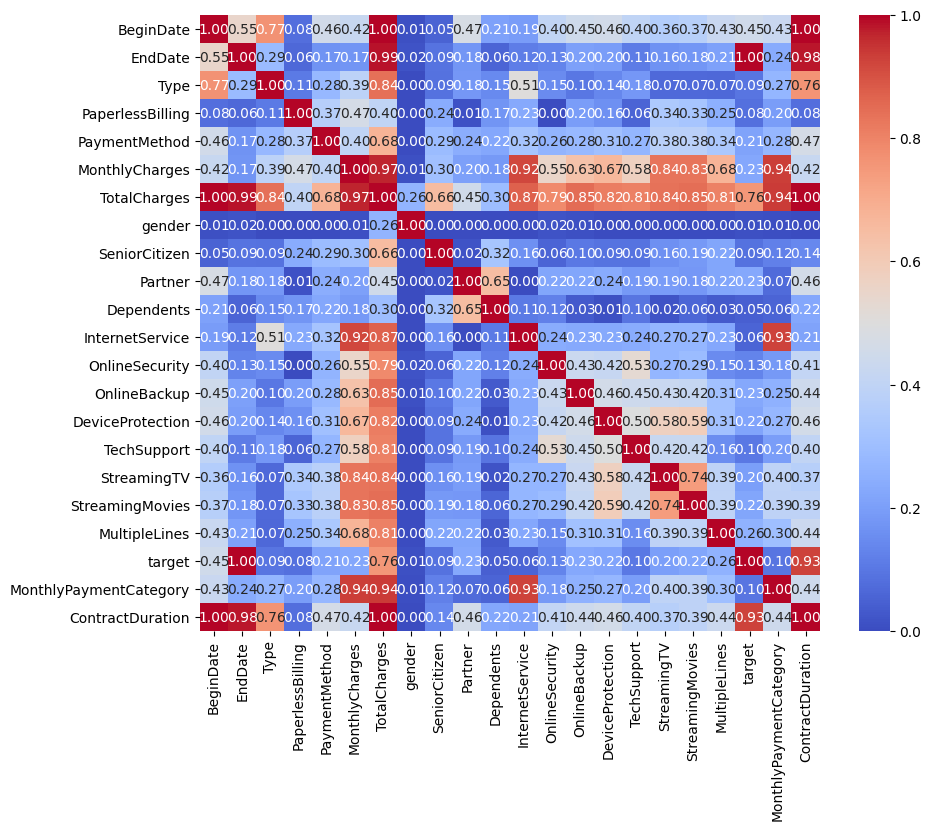

In [44]:
interval_cols = ['MonthlyCharges', 'target']

phik_corr_matrix = specialcorrdf.phik_matrix(interval_cols=interval_cols)

plt.figure(figsize=(10, 8), dpi=100)
sns.heatmap(phik_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Способ оплаты услуг имеет сильную корреляцию с типом подключения к интернету и стриминговыми сервисами. 

Клиенты, выбирающие определенные способы оплаты, могут предпочитать определенные типы подключения и использовать больше стриминговых сервисов.

Наличие супруга или супруги коррелирует с наличием иждивенцев. 

Категория плательщика также коррелирует с подключением к интернету.

Отсутствует значительная корреляция между возрастом клиента и другими признаками.

# Разделение данных на обучающую и тестовую выборки

In [26]:
target = data['target'].astype('int')
features = data.drop(['EndDate','target','customerID','BeginDate'], axis=1)

In [27]:
target.shape

(7043,)

In [28]:
features.shape

(7043, 19)

In [29]:
features = features.drop(columns = [ 'Partner','gender', 'MonthlyPaymentCategory','TotalCharges'], axis=1)

In [30]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=30723)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

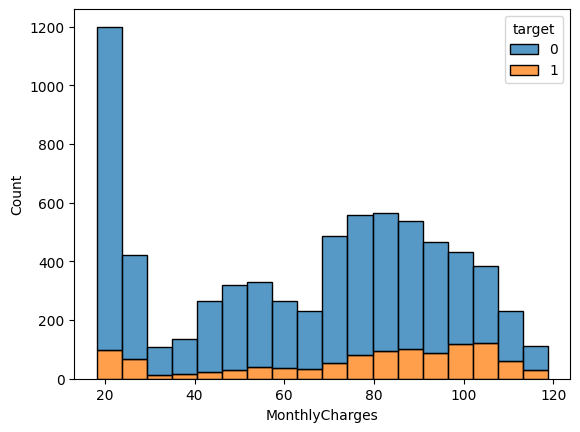

In [31]:
sns.histplot(data, x='MonthlyCharges', hue='target', multiple='stack')

Больше клиентов уходит от 80 до 110. Возможно их переманивают конкуренты которые предлагают более дешевые услуги. От 30 до 70 самый меньший отток, в этой ценовой кат все хорошо

# 5. Кодирование и масштабирование признаков

In [32]:
features_train_dummy = pd.get_dummies(features_train)

In [33]:
features_test_dummy = pd.get_dummies(features_test)
missing_cols = set(features_train_dummy.columns) - set(features_test_dummy.columns)
for col in missing_cols:
    features_test_encoded[col] = 0

In [34]:
scaler = StandardScaler()

numeric_cols = ['MonthlyCharges','ContractDuration']

scaled_features_train = scaler.fit_transform(features_train_dummy[numeric_cols])
scaled_features_test = scaler.transform(features_test_dummy[numeric_cols])

In [35]:
scaled_features_train

array([[-1.49247434, -1.26780117],
       [ 0.33964819, -0.28613439],
       [-1.48079415, -1.26780117],
       ...,
       [ 0.44310137,  0.11739082],
       [ 0.19448001, -0.06162764],
       [ 1.02210549, -0.68819223]])

# 6. Выбор подходящей модели машинного обучения

In [36]:
%%time

state = 30723
model = RandomForestClassifier(random_state = 30723, class_weight = 'balanced')

param_dict = {'max_depth': range(2, 10),
'n_estimators': [10, 50, 100],
'min_samples_leaf': range(1, 6),
'max_features': range(1, 7)}

gridrfc = GridSearchCV(model, param_dict, cv=5, scoring='roc_auc', n_jobs=-1)

gridrfc.fit(scaled_features_train, target_train)
print("лучший AUC", gridrfc.best_score_)
print("лучший парам", gridrfc.best_params_)

лучший AUC 0.8064435023330578
лучший парам {'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 100}
CPU times: total: 4.48 s
Wall time: 28.9 s


In [37]:
%%time
cv = 7
model = DecisionTreeClassifier(random_state = 30723, class_weight = 'balanced')

param_dict = {'max_depth': range(2, 10),
'min_samples_leaf': range(2, 10),
'max_features': range(0, 10)}

griddtr = GridSearchCV(model, param_dict, cv=cv, scoring='roc_auc', n_jobs=-1)

griddtr.fit(scaled_features_train, target_train)
print("лучший AUC", griddtr.best_score_)
print("лучший парам:", griddtr.best_params_)

лучший AUC 0.7680881806401904
лучший парам: {'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 3}
CPU times: total: 875 ms
Wall time: 2.07 s


In [38]:
%%time

cv = 7
model = CatBoostClassifier(random_seed=30723)

param_dict = {
'max_depth': (4, 8),
'learning_rate': [0.1, 0.5, 1],
'iterations': [300, 400, 500]
}

gridcb = GridSearchCV(model, param_dict, cv=cv, scoring='roc_auc', n_jobs=-1)

gridcb.fit(scaled_features_train, target_train)

print("лучший AUC", gridcb.best_score_)
print("лучший парам", gridcb.best_params_)

0:	learn: 0.6238326	total: 147ms	remaining: 1m 13s
1:	learn: 0.5682244	total: 148ms	remaining: 36.8s
2:	learn: 0.5238624	total: 149ms	remaining: 24.7s
3:	learn: 0.4886849	total: 150ms	remaining: 18.6s
4:	learn: 0.4647849	total: 151ms	remaining: 15s
5:	learn: 0.4483192	total: 152ms	remaining: 12.5s
6:	learn: 0.4362242	total: 153ms	remaining: 10.8s
7:	learn: 0.4229471	total: 154ms	remaining: 9.49s
8:	learn: 0.4143532	total: 155ms	remaining: 8.48s
9:	learn: 0.4048608	total: 156ms	remaining: 7.66s
10:	learn: 0.3973833	total: 157ms	remaining: 7s
11:	learn: 0.3932187	total: 158ms	remaining: 6.45s
12:	learn: 0.3904024	total: 160ms	remaining: 5.98s
13:	learn: 0.3865674	total: 161ms	remaining: 5.59s
14:	learn: 0.3821688	total: 163ms	remaining: 5.25s
15:	learn: 0.3790879	total: 164ms	remaining: 4.96s
16:	learn: 0.3772459	total: 165ms	remaining: 4.69s
17:	learn: 0.3754586	total: 166ms	remaining: 4.45s
18:	learn: 0.3733982	total: 168ms	remaining: 4.24s
19:	learn: 0.3709515	total: 169ms	remaining: 

In [39]:
%%time

cv = 7
model = LGBMClassifier(random_state=30723, class_weight='balanced')

param_dict = {
'max_depth': range(2, 10),
'learning_rate': [0.01, 0.1, 0.5],
'num_leaves': [40, 20, 100],
'n_estimators': [300, 400, 600]
}

gridlgbm = GridSearchCV(model, param_dict, cv=cv, scoring='roc_auc', n_jobs=-1)

gridlgbm.fit(scaled_features_train, target_train)

print("лучший AUC", gridlgbm.best_score_)
print("лучший парам", gridlgbm.best_params_)

лучший AUC 0.8937752619168133
лучший парам {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 300, 'num_leaves': 40}
CPU times: total: 4.56 s
Wall time: 37.5 s


# Тест лучшей модели

In [40]:
model = CatBoostClassifier(random_seed=30723, iterations= 500, learning_rate = 0.1, max_depth = 4)

model.fit(scaled_features_train, target_train)

predictions = model.predict_proba(scaled_features_test)[:, 1]

auc = roc_auc_score(target_test, predictions)

0:	learn: 0.6238326	total: 2.17ms	remaining: 1.08s
1:	learn: 0.5682244	total: 4.17ms	remaining: 1.04s
2:	learn: 0.5238624	total: 5.79ms	remaining: 959ms
3:	learn: 0.4886849	total: 7.5ms	remaining: 930ms
4:	learn: 0.4647849	total: 9.35ms	remaining: 926ms
5:	learn: 0.4483192	total: 11.2ms	remaining: 924ms
6:	learn: 0.4362242	total: 13ms	remaining: 918ms
7:	learn: 0.4229471	total: 14.9ms	remaining: 917ms
8:	learn: 0.4143532	total: 16.9ms	remaining: 923ms
9:	learn: 0.4048608	total: 18.7ms	remaining: 916ms
10:	learn: 0.3973833	total: 20.6ms	remaining: 918ms
11:	learn: 0.3932187	total: 22.4ms	remaining: 910ms
12:	learn: 0.3904024	total: 24.2ms	remaining: 908ms
13:	learn: 0.3865674	total: 26.1ms	remaining: 904ms
14:	learn: 0.3821688	total: 28ms	remaining: 904ms
15:	learn: 0.3790879	total: 29.8ms	remaining: 900ms
16:	learn: 0.3772459	total: 31.5ms	remaining: 894ms
17:	learn: 0.3754586	total: 33.2ms	remaining: 890ms
18:	learn: 0.3733982	total: 35.3ms	remaining: 893ms
19:	learn: 0.3709515	total:

In [41]:
print("AUC:", auc)

AUC: 0.9187232399134142


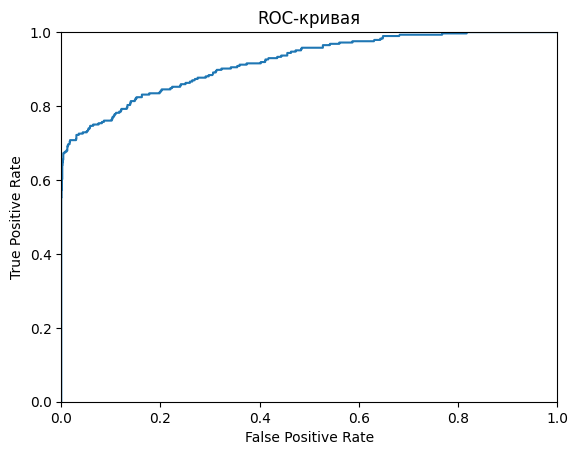

In [46]:
fpr, tpr, thresholds = roc_curve(target_test, predictions)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

# Вывод

Исходя из анализа данных о телефонных услугах, можно сделать следующие основные выводы:

Некоторые признаки, такие как тип подключения к интернету и стриминговые сервисы, имеют сильное влияние на отток клиентов.  Следует обратить особое внимание на улучшение качества и предложение этих услуг, чтобы удержать клиентов.

Способ оплаты услуг также имеет значительное влияние на отток клиентов. Надо найти удобные и гибкие системы оплаты, чтобы клиенты оставались довольными и продолжали пользоваться услугами компании.

Возраст клиентов не имеет сильного влияния на отток.

Высокий отток в диапазоне от 80 до 110. Возможно, в этом ценовом диапазоне конкуренты предлагают более привлекательные условия, и стоит пересмотреть свои ценовые стратегии в этом сегменте.

Модель CatBoost, обученная на выборке, показала хороший результат с показателем AUC равным 0.9187.

На основе этих выводов, надо принять меры по улучшению качества услуг, особенно в области интернета и стриминговых сервисов, а также разработать гибкие и удобные системы оплаты.

# Отчет по проекту

В предобработке данных было 4 датасета (personal, contract, internet, phone). В этих датасетах небыло пропусков, но при объединении в один большой датасет появились пропуски которые были успешно убранны.

Были добавлены target показывающий ушел ли клиент, MonthlyPaymentCategory это разделение абонентов по их платежам и ContractDuration это продолжительность контракта до даты выгрузки датасета 2020-02-01.

Разделена модель на test и train, размер тестовой выборки 25%.  random_state=30723. В features были удалены (EndDate,target,customerID,BeginDate) за их ненадобностью. 

Произведено кодирование с помощью getdummy и маштабирование StandartScaler.

При поиске подходящей модели были с использованы (RandomForestClassifier, DecisionTreeClassifier, CatBoostClassifier, LGBMClassifier).

• RandomForestClassifier лучшие параметры {'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 100} при лучшем AUC 0.806.

• DecisionTreeClassifier лучшие параметры {'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 3} при лучшем AUC 0.768.

• CatBoostClassifier лучшие параметры {'iterations': 500, 'learning_rate': 0.1, 'max_depth': 4} при лучшем AUC 0.913.

• LGBMClassifier лучшие параметры {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 300, 'num_leaves': 40} при лучшем AUC 0.894.

Отличий от исходного плана нет.

Трудности в работе были с кодированием и маштабированием я их изначально не правльно сделал и это привело к поломке дальнейшего кода.

Все этапы важны.

# Итоговая модель

Итоговой моделью была CatBoostClassifier при параметрах (random_seed=30723, iterations= 500, learning_rate = 0.1, max_depth = 4). Метрика ROC-AUC достигла 0.92.